<a href="https://colab.research.google.com/github/sidsanc/258_DeepLearning/blob/main/CatchUp_Assignment/Part1_KerasCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# a) Classificaton with KerasCV


## a.i) Transfer Learning (direct inference)

In [ ]:
!pip install keras_cv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.6/721.6 kB 3.6 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from keras.datasets import cifar10

from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.utils import to_categorical

In [ ]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
from tensorflow.python import test
train_images = train_images/255
test_images = test_images/255

train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes = 10)

In [ ]:
vgg_model = VGG16(weights = 'imagenet', include_top = False, input_shape = (32, 32, 3))

vgg_model.layers.pop()

num_classes = 10

x = Flatten()(vgg_model.output)
output = Dense(num_classes, activation = 'softmax')(x)
model = Model(inputs = vgg_model.input, outputs = output)

for layer in model.layers[:-1]:
  layer.trainable = False

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[i])
    plt.axis('off')
plt.show()

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.fit(train_images, train_labels, batch_size = 32, epochs = 10, validation_data = (test_images, test_labels))

loss, accuracy = model.evaluate(test_images, test_labels)

predictions = model.predict(test_images[:9])
predicted_labels = decode_predictions(predictions, top=1)

Epoch 1/10
1563/1563 [==============================] - 814s 520ms/step - loss: 1.5350 - accuracy: 0.4779 - val_loss: 1.3702 - val_accuracy: 0.5310
Epoch 2/10
1563/1563 [==============================] - 839s 537ms/step - loss: 1.3099 - accuracy: 0.5525 - val_loss: 1.3051 - val_accuracy: 0.5465
Epoch 3/10
1563/1563 [==============================] - 799s 511ms/step - loss: 1.2504 - accuracy: 0.5724 - val_loss: 1.2640 - val_accuracy: 0.5631
Epoch 4/10
1563/1563 [==============================] - 783s 501ms/step - loss: 1.2181 - accuracy: 0.5821 - val_loss: 1.2438 - val_accuracy: 0.5698
Epoch 5/10
1563/1563 [==============================] - 772s 494ms/step - loss: 1.1964 - accuracy: 0.5887 - val_loss: 1.2305 - val_accuracy: 0.5716
Epoch 6/10
1563/1563 [==============================] - 768s 491ms/step - loss: 1.1806 - accuracy: 0.5926 - val_loss: 1.2189 - val_accuracy: 0.5722
Epoch 7/10
1563/1563 [==============================] - 768s 492ms/step - loss: 1.1684 - accuracy: 0.5975 - val_

In [ ]:
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

Test loss: 1.2013
Test accuracy: 0.5798


In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[i])
    plt.title(f"Predicted: {predicted_labels[i][0][1]}")
    plt.axis('off')
plt.show()

## a.ii) Fine-tuning

In [ ]:
vgg_model = VGG16(weights = 'imagenet', include_top = False, input_shape = (32, 32, 3))

num_classes = 10

x = Flatten()(vgg_model.output)
output = Dense(num_classes, activation = 'softmax')(x)
model = Model(inputs = vgg_model.input, outputs = output)

for layer in model.layers[:-5]:
  layer.trainable = 
  
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[i])
    plt.axis('off')
plt.show()

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.fit(train_images, train_labels, batch_size = 32, epochs = 10, validation_data = (test_images, test_labels))

loss_fine_tune, accuracy_fine_tune = model.evaluate(test_images, test_labels)

Epoch 1/10
1563/1563 [==============================] - 1957s 1s/step - loss: 1.1440 - accuracy: 0.6002 - val_loss: 0.9769 - val_accuracy: 0.6576
Epoch 2/10
1563/1563 [==============================] - 1957s 1s/step - loss: 0.9208 - accuracy: 0.6779 - val_loss: 0.9194 - val_accuracy: 0.6775
Epoch 3/10
1563/1563 [==============================] - 1951s 1s/step - loss: 0.8281 - accuracy: 0.7090 - val_loss: 0.8961 - val_accuracy: 0.6959
Epoch 4/10
1563/1563 [==============================] - 1960s 1s/step - loss: 0.7632 - accuracy: 0.7306 - val_loss: 0.8892 - val_accuracy: 0.6957
Epoch 5/10
1563/1563 [==============================] - 1938s 1s/step - loss: 0.7058 - accuracy: 0.7520 - val_loss: 0.9201 - val_accuracy: 0.6921
Epoch 6/10
1481/1563 [===========================>..] - ETA: 1:34 - loss: 0.6520 - accuracy: 0.7685

In [ ]:
predictions = model.predict(test_images[:9])
predicted_labels = decode_predictions(predictions, top=1)

# for i in range(9):
#     print(f"Predicted class for image {i+1}: {predicted_labels[i][0][1]}")

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[i].reshape(32, 32, 3))
plt.title(f"Predicted: {predicted_labels[i][0][1]}")
plt.axis('off')
plt.show()

In [ ]:
print(f"Test loss: {loss_fine_tune:.4f}")
print(f"Test accuracy: {accuracy_fine_tune:.4f}")

## Image Classifier from Scratch

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_images, train_labels, batch_size=32, epochs=10, validation_data=(test_images, test_labels))

loss_scratch, accuracy_scratch = model.evaluate(test_images, test_labels)


In [ ]:
print(f"Test loss: {loss_scratch:.4f}")
print(f"Test accuracy: {accuracy_scratch:.4f}")

In [ ]:
predictions = model.predict(test_images[:9])
predicted_labels = [str(np.argmax(pred)) for pred in predictions]

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[i])
    plt.axis('off')
plt.show()

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[i])
    plt.title(f"Predicted: {predicted_labels[i]}")
    plt.axis('off')
plt.show()

#  Object Detection with Keras CV

## b.i) Transfer Learning from Pretrained Models:

In [ ]:
import keras
from keras.datasets import cifar10
from keras_cv.applications import EfficientDetModel, EfficientDetConfig
from keras_cv.object_detection import AnchorParameters, BBoxUtility
import numpy as np


In [ ]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0v

In [ ]:
anchor_params = AnchorParameters.default
config = EfficientDetConfig(anchor_params)
model = EfficientDetModel(config=config, pretrained="imagenet")

bbox_util = BBoxUtility(num_classes=10, anchors=anchor_params.sizes)

train_images_rgb = np.repeat(train_images[..., np.newaxis], 3, -1)
test_images_rgb = np.repeat(test_images[..., np.newaxis], 3, -1)

sample_image = test_images_rgb[0:1]
preds = model.predict(sample_image)

boxes, labels, scores = bbox_util.detection_out(preds)

In [ ]:
print("Predicted Bounding Boxes:")
print(boxes)
print("Predicted Labels:")
print(labels)

In [ ]:
plt.figure(figsize=(5, 5))
plt.imshow(test_images[0])
plt.axis('off')
plt.title('Input Image')
plt.show()

plt.figure(figsize=(5, 5))
plt.imshow(test_images[0])
for box, label, score in zip(boxes[0], labels[0], scores[0]):
    if score > 0.5:
        plt.rectangle(
            (box[0], box[1]), box[2] - box[0], box[3] - box[1], 
            edgecolor='red', linewidth=2, fill=False
        )
        plt.text(
            box[0], box[1] - 5, 
            f'{label}: {score:.2f}', 
            color='red', fontsize=10, backgroundcolor='white'
        )
plt.axis('off')
plt.title('Annotated Output Image')
plt.show()

# c. Image Augmentation using KerasCV

# d. High performance image generation with stable diffusion with keras cv

In [ ]:
# import keras_cv.applications.stable_diffusion_v2 as sd
import matplotlib.pyplot as plt
import keras_cv

In [ ]:
model = keras_cv.models.StableDiffusion(img_width=512, img_height=512)

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE


198180272/198180272 [==============================] - 1s 0us/step


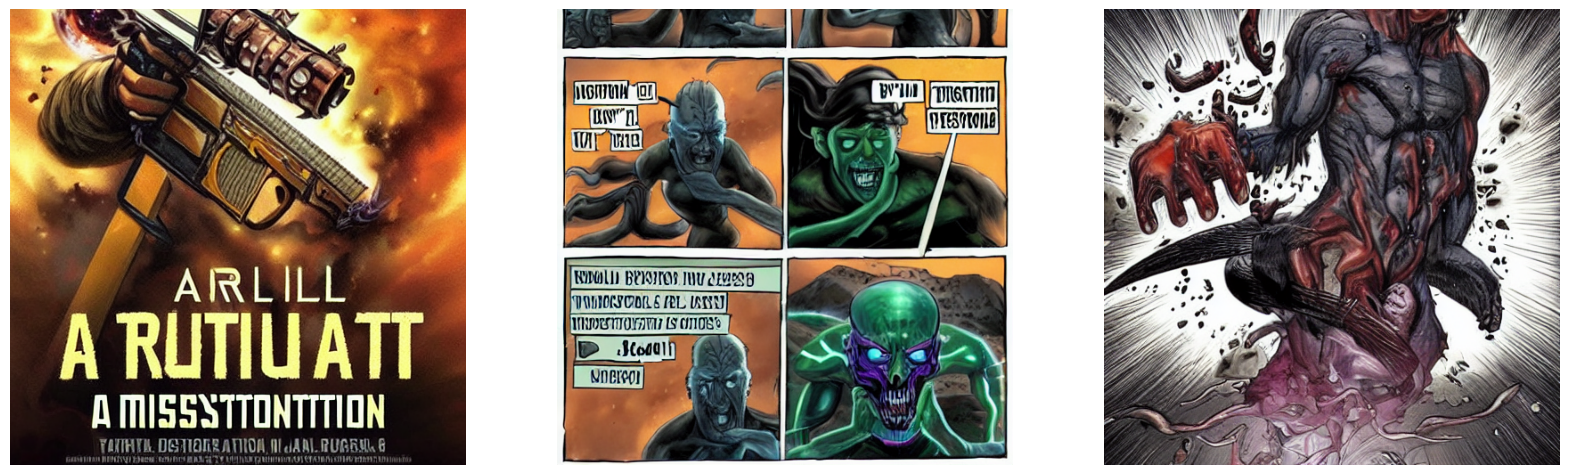

In [ ]:
images = model.text_to_image("A mutant with destruction in parallel universe", batch_size=3)


def plot_images(images):
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.axis("off")


plot_images(images)